In [17]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Defining augmentations
augment = A.Compose([
    A.Rotate(limit=180, p=0.8),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.3),
    A.RandomCrop(height=800, width=800, p=0.5),
    A.RandomScale(scale_limit = 0.1, p=0.5),
], additional_targets={'mask': 'mask'})


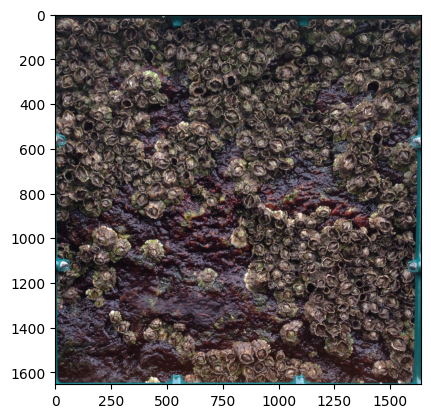

In [19]:
# Load image and mask
roi1 = cv2.imread('barnacle_dataset/train/images/roi_img1.png')
roi1 = cv2.cvtColor(roi1, cv2.COLOR_BGR2RGB)
roi2 = cv2.imread('barnacle_dataset/train/images/roi_img2.png')
roi2 = cv2.cvtColor(roi2, cv2.COLOR_BGR2RGB)

mask1 = cv2.imread('barnacle_dataset/train/masks/mask_roi_img1.png', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread('barnacle_dataset/train/masks/mask_roi_img2.png', cv2.IMREAD_GRAYSCALE)

# displaying all the images
plt.imshow(roi2)

In [20]:
# Generate augmented images
for i in range(50):
    augmented = augment(image=roi1, mask=mask1)
    roi1_aug = augmented['image']
    mask1_aug = augmented['mask']

    augmented = augment(image=roi2, mask=mask2)
    roi2_aug = augmented['image']
    mask2_aug = augmented['mask']

    # convert RGB to BGR so that the imwrite will save the image correctly
    roi1_aug = cv2.cvtColor(roi1_aug, cv2.COLOR_RGB2BGR)
    roi2_aug = cv2.cvtColor(roi2_aug, cv2.COLOR_RGB2BGR)

    cv2.imwrite(f'barnacle_dataset/train/images/roi_img1_aug_{i}.png', roi1_aug)
    cv2.imwrite(f'barnacle_dataset/train/images/roi_img2_aug_{i}.png', roi2_aug)
    cv2.imwrite(f'barnacle_dataset/train/masks/mask_roi_img1_aug_{i}.png', mask1_aug)
    cv2.imwrite(f'barnacle_dataset/train/masks/mask_roi_img2_aug_{i}.png', mask2_aug)